Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Open the data file for reading

In [3]:
#save file in Pandas DataFrame
rawData = pd.read_csv('PGA Tour Raw Data.csv')
rawData.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,...,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,...,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,21.5,17.4,27,0,0.0,...,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,20.5,13.6,17,0,0.4,...,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,23.5,18.1,23,0,1.2,...,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04


clean the data to eliminate unnecessary columns

In [4]:
#dropping any rows/columns with missing data
null_columns = rawData.isnull().any()

# Print columns with null value
print(null_columns)

Player_initial_last    False
tournament id          False
player id              False
hole_par               False
strokes                False
hole_DKP               False
hole_FDP               False
hole_SDP               False
streak_DKP             False
streak_FDP             False
streak_SDP             False
n_rounds               False
made_cut               False
pos                     True
finish_DKP             False
finish_FDP             False
finish_SDP             False
total_DKP              False
total_FDP              False
total_SDP              False
player                 False
Unnamed: 2              True
Unnamed: 3              True
Unnamed: 4              True
tournament name        False
course                 False
date                   False
purse                  False
season                 False
no_cut                 False
Finish                  True
sg_putt                 True
sg_arg                  True
sg_app                  True
sg_ott        

In [5]:
#create a new dataframe with only the columns that are important for analysis
columns_to_drop = ["Player_initial_last", "hole_DKP", "hole_FDP", "hole_SDP", "streak_DKP",
                    "streak_FDP", "streak_SDP", "made_cut", "pos", "finish_DKP", "finish_FDP",
                    "finish_SDP", "total_DKP", "total_FDP", "total_SDP", "Unnamed: 2", "Unnamed: 3",
                    "Unnamed: 4", "purse", "no_cut"]

cleanData = rawData.drop(columns=columns_to_drop)

In [6]:
#Clean up any rows with a "n_rounds" value not equal to 4, to keep data points consistent
cleanData = cleanData[cleanData.n_rounds == 4]

# Clean up any rows with a 'sg_total' value of NA
cleanData = cleanData.dropna(subset=['sg_total'])

#Determine and save the total average strokes for each tournament, and the average score to par
scoreToPar = cleanData['strokes']-cleanData['hole_par']
cleanData['score_to_par'] = scoreToPar

# Print the first 5 rows of the new data
print(cleanData.head())

   tournament id  player id  hole_par  strokes  n_rounds         player  \
0      401353224       9261       288      289         4  Abraham Ancer   
1      401353224       5548       288      286         4    Adam Hadwin   
6      401353224      10906       288      287         4      Aaron Rai   
7      401353224      10372       288      287         4    Adam Schenk   
8      401353224        388       288      299         4     Adam Scott   

                               tournament name  \
0  The Memorial Tournament pres. by Nationwide   
1  The Memorial Tournament pres. by Nationwide   
6  The Memorial Tournament pres. by Nationwide   
7  The Memorial Tournament pres. by Nationwide   
8  The Memorial Tournament pres. by Nationwide   

                                     course    date  season Finish  sg_putt  \
0  Muirfield Village Golf Club - Dublin, OH  6/5/22    2022    T32     0.20   
1  Muirfield Village Golf Club - Dublin, OH  6/5/22    2022    T18     0.36   
6  Muirfiel

Now, we will separate the data by region into separate dataframes.
I have decided to select the top 8 yearly tournaments from each region to analyze.
The regions are Northeast, Southeast, and West (There is not much going on in the northwest, so I combined north and south)

In [7]:
valuesNE = ['3M Open', 'John Deere Classic', 'BMW Championship', 'Rocket Mortgage Classic',
            'RBC Canadian Open', 'Barbasol Championship', 'Travelers Championship']

# Select rows where 'tournament name' is in the specified values
northEastRegion = cleanData[cleanData['tournament name'].isin(valuesNE)]

# pd.set_option('display.max_columns', None)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', None)
# pd.set_option('display.max_rows', None)


# # Print the entire DataFrame
# print(northEastRegion)

In [8]:
#Now, do the same for the other regions

#SouthEast
valuesSE = ['The Honda Classic', 'Valspar Championship', 'Arnold Palmer Invitational Pres. by Mastercard', 'RBC Heritage',
            'Wyndham Championship', 'Sanderson Farms Championship', 'Tour Championship']
southEastRegion = cleanData[cleanData['tournament name'].isin(valuesSE)]

#West
valuesWest = ['Valero Texas Open', 'Shriners Hospitals for Children Open', 'Waste Management Phoenix Open',
            'AT&T Byron Nelson', 'The American Express', 'Farmers Insurance Open',
            'The Genesis Invitational', 'Charles Schwab Challenge']
westRegion = cleanData[cleanData['tournament name'].isin(valuesWest)]

Now, ensure the data was successfully copied into these new dataframes

In [9]:
# Check which columns have null values
null_columns = northEastRegion.isnull().any()
column_types = northEastRegion.dtypes

# Print columns with null value
print(null_columns)
print(column_types)

tournament id      False
player id          False
hole_par           False
strokes            False
n_rounds           False
player             False
tournament name    False
course             False
date               False
season             False
Finish             False
sg_putt            False
sg_arg             False
sg_app             False
sg_ott             False
sg_t2g             False
sg_total           False
score_to_par       False
dtype: bool
tournament id        int64
player id            int64
hole_par             int64
strokes              int64
n_rounds             int64
player              object
tournament name     object
course              object
date                object
season               int64
Finish              object
sg_putt            float64
sg_arg             float64
sg_app             float64
sg_ott             float64
sg_t2g             float64
sg_total           float64
score_to_par         int64
dtype: object


In [10]:
# Check which columns have null values
null_columns = southEastRegion.isnull().any()
column_types = southEastRegion.dtypes

# Print columns with null value
print(null_columns)
print(column_types)

tournament id      False
player id          False
hole_par           False
strokes            False
n_rounds           False
player             False
tournament name    False
course             False
date               False
season             False
Finish             False
sg_putt            False
sg_arg             False
sg_app             False
sg_ott             False
sg_t2g             False
sg_total           False
score_to_par       False
dtype: bool
tournament id        int64
player id            int64
hole_par             int64
strokes              int64
n_rounds             int64
player              object
tournament name     object
course              object
date                object
season               int64
Finish              object
sg_putt            float64
sg_arg             float64
sg_app             float64
sg_ott             float64
sg_t2g             float64
sg_total           float64
score_to_par         int64
dtype: object


In [11]:
# Check which columns have null values
null_columns = westRegion.isnull().any()
column_types = westRegion.dtypes

# Print columns with null value
print(null_columns)
print(column_types)

tournament id      False
player id          False
hole_par           False
strokes            False
n_rounds           False
player             False
tournament name    False
course             False
date               False
season             False
Finish             False
sg_putt            False
sg_arg             False
sg_app             False
sg_ott             False
sg_t2g             False
sg_total           False
score_to_par       False
dtype: bool
tournament id        int64
player id            int64
hole_par             int64
strokes              int64
n_rounds             int64
player              object
tournament name     object
course              object
date                object
season               int64
Finish              object
sg_putt            float64
sg_arg             float64
sg_app             float64
sg_ott             float64
sg_t2g             float64
sg_total           float64
score_to_par         int64
dtype: object


Now that the data is cleaned and sorted into the different regions, it is time to begin analysing the data 

In [12]:
# Create a dictionary to store each tournament name and the average strokes for that tournament
# Get the unique tournament names
tournament_names = northEastRegion['tournament name'].unique()

# Initialize an empty dictionary to store the averages
strokeAveragesNE = {}

for name in tournament_names:

    selected_rows = northEastRegion[northEastRegion['tournament name'] == name]
    
    # Calculate the mean of 'strokes' for the selected rows
    stroke_mean = np.mean(selected_rows['strokes'])
    
    # Add the tournament name and average to the dictionary
    strokeAveragesNE[name] = stroke_mean

# Print the dictionary
print(strokeAveragesNE)

{'BMW Championship': 279.3667481662592, '3M Open': 274.9389671361502, 'Barbasol Championship': 274.1766666666667, 'John Deere Classic': 273.9139240506329, 'Rocket Mortgage Classic': 277.2258064516129, 'Travelers Championship': 274.2636579572447, 'RBC Canadian Open': 264.9797687861272}


In [13]:
# Now, do the same for the other regions
#SouthEast
tournament_names = southEastRegion['tournament name'].unique()

strokeAveragesSE = {}

for name in tournament_names:

    selected_rows = southEastRegion[southEastRegion['tournament name'] == name]
    
    stroke_mean = np.mean(selected_rows['strokes'])
    
    strokeAveragesSE[name] = stroke_mean

print(strokeAveragesSE)

{'RBC Heritage': 279.35346358792185, 'Valspar Championship': 282.8678304239402, 'Arnold Palmer Invitational Pres. by Mastercard': 288.3407258064516, 'The Honda Classic': 281.75735294117646, 'Sanderson Farms Championship': 280.49187935034803, 'Tour Championship': 278.13106796116506, 'Wyndham Championship': 270.67080745341616}


In [14]:
tournament_names = westRegion['tournament name'].unique()

strokeAveragesWE = {}

for name in tournament_names:

    selected_rows = westRegion[westRegion['tournament name'] == name]
    
    stroke_mean = np.mean(selected_rows['strokes'])
    
    strokeAveragesWE[name] = stroke_mean

print(strokeAveragesWE)

{'Charles Schwab Challenge': 278.29285714285714, 'AT&T Byron Nelson': 273.8079331941545, 'Valero Texas Open': 285.4559139784946, 'The Genesis Invitational': 281.2995169082126, 'Waste Management Phoenix Open': 277.76880733944955, 'Farmers Insurance Open': 285.36660929432014, 'The American Express': 276.70142180094786}


In [15]:
#Now, I want to store the average score to par for each tournament in a dictionary
unique_tournaments = np.unique(northEastRegion['tournament name'])

scoreToParNE = {}

for tournament in unique_tournaments:
    
    tournament_data = northEastRegion[northEastRegion['tournament name'] == tournament]['score_to_par']

    average_score_to_par = np.mean(tournament_data)
    
    scoreToParNE[tournament] = average_score_to_par

print(scoreToParNE)

{'3M Open': -9.061032863849766, 'BMW Championship': -5.288508557457213, 'Barbasol Championship': -12.343333333333334, 'John Deere Classic': -10.086075949367089, 'RBC Canadian Open': -7.465317919075145, 'Rocket Mortgage Classic': -10.774193548387096, 'Travelers Championship': -5.736342042755345}


In [16]:
unique_tournaments = np.unique(southEastRegion['tournament name'])

scoreToParSE = {}

for tournament in unique_tournaments:
    
    tournament_data = southEastRegion[southEastRegion['tournament name'] == tournament]['score_to_par']

    average_score_to_par = np.mean(tournament_data)
    
    scoreToParSE[tournament] = average_score_to_par

print(scoreToParSE)

{'Arnold Palmer Invitational Pres. by Mastercard': 0.3407258064516129, 'RBC Heritage': -4.646536412078153, 'Sanderson Farms Championship': -7.508120649651972, 'The Honda Classic': 1.7573529411764706, 'Tour Championship': -1.8689320388349515, 'Valspar Championship': -1.1321695760598505, 'Wyndham Championship': -9.329192546583851}


In [17]:
unique_tournaments = np.unique(westRegion['tournament name'])

scoreToParWE = {}

for tournament in unique_tournaments:
    
    tournament_data = westRegion[westRegion['tournament name'] == tournament]['score_to_par']

    average_score_to_par = np.mean(tournament_data)
    
    scoreToParWE[tournament] = average_score_to_par

print(scoreToParWE)

{'AT&T Byron Nelson': -10.559498956158665, 'Charles Schwab Challenge': -1.707142857142857, 'Farmers Insurance Open': -2.2409638554216866, 'The American Express': -11.298578199052132, 'The Genesis Invitational': -2.7004830917874396, 'Valero Texas Open': -2.544086021505376, 'Waste Management Phoenix Open': -6.231192660550459}


In [18]:
#Now, I want to see the results for each year in each region
#NorthEast
unique_years = np.arange(2017, 2022)
unique_tournaments = np.unique(northEastRegion['tournament name'])

# Create a dictionary to store the sg_total averages for each unique tournament name for each year
sg_total_averagesNE = {}

for year in unique_years:
    # Get the data for the current year
    year_data = northEastRegion[northEastRegion['season'] == year]
    
    # Create a dictionary to store the sg_total averages for each unique tournament name for the current year
    sg_total_averages_year = {}
    
    #Now loop through the unique tournaments and save each average shots gained total
    for tournament in unique_tournaments:
        
        tournament_data = year_data[year_data['tournament name'] == tournament]['sg_total']
        
        average_sg_total = np.mean(tournament_data)
        
        sg_total_averages_year[tournament] = average_sg_total
    
        sg_total_averagesNE[year] = sg_total_averages_year

#Now replace any nan values with the average of the rest of the years for that tournament
tournament_averages = {}
for tournament in unique_tournaments:
    total = 0
    count = 0
    for year in unique_years:
        if not np.isnan(sg_total_averagesNE[year][tournament]):
            total += sg_total_averagesNE[year][tournament]
            count += 1
    tournament_averages[tournament] = total / count if count > 0 else np.nan

for year in unique_years:
    for tournament in unique_tournaments:
        if np.isnan(sg_total_averagesNE[year][tournament]):
            sg_total_averagesNE[year][tournament] = tournament_averages[tournament]

print(sg_total_averagesNE)

{2017: {'3M Open': 0.9999439296266451, 'BMW Championship': 0.003256074168797952, 'Barbasol Championship': 1.0213559322033898, 'John Deere Classic': 1.0273529411764704, 'RBC Canadian Open': 0.9938235294117649, 'Rocket Mortgage Classic': 0.8710488368809348, 'Travelers Championship': 1.0594366197183092}, 2018: {'3M Open': 0.9999439296266451, 'BMW Championship': 0.008676470588235202, 'Barbasol Championship': 1.0935849056603775, 'John Deere Classic': 1.0502941176470586, 'RBC Canadian Open': 0.9502777777777778, 'Rocket Mortgage Classic': 0.8710488368809348, 'Travelers Championship': 1.0414492753623186}, 2019: {'3M Open': 1.1232876712328768, 'BMW Championship': 0.0024637681159420297, 'Barbasol Championship': 1.0075757575757576, 'John Deere Classic': 1.0955072463768114, 'RBC Canadian Open': 1.0055072463768115, 'Rocket Mortgage Classic': 0.9421126760563382, 'Travelers Championship': 1.0065217391304349}, 2020: {'3M Open': 0.9727941176470587, 'BMW Championship': 0.004782608695652204, 'Barbasol Ch

In [19]:
#SouthEast
unique_years = np.arange(2017, 2022)
unique_tournaments = np.unique(southEastRegion['tournament name'])

sg_total_averagesSE = {}

for year in unique_years:
    year_data = southEastRegion[southEastRegion['season'] == year]
    
    sg_total_averages_year = {}
    
    for tournament in unique_tournaments:
        
        tournament_data = year_data[year_data['tournament name'] == tournament]['sg_total']
        
        average_sg_total = np.mean(tournament_data)
        
        sg_total_averages_year[tournament] = average_sg_total
    
        sg_total_averagesSE[year] = sg_total_averages_year

tournament_averages = {}
for tournament in unique_tournaments:
    total = 0
    count = 0
    for year in unique_years:
        if not np.isnan(sg_total_averagesSE[year][tournament]):
            total += sg_total_averagesSE[year][tournament]
            count += 1
    tournament_averages[tournament] = total / count if count > 0 else np.nan

for year in unique_years:
    for tournament in unique_tournaments:
        if np.isnan(sg_total_averagesSE[year][tournament]):
            sg_total_averagesSE[year][tournament] = tournament_averages[tournament]


print(sg_total_averagesSE)

{2017: {'Arnold Palmer Invitational Pres. by Mastercard': 0.8511594202898553, 'RBC Heritage': 0.7285714285714288, 'Sanderson Farms Championship': 0.809298245614035, 'The Honda Classic': 0.8500000000000001, 'Tour Championship': -0.00333333333333344, 'Valspar Championship': 0.917910447761194, 'Wyndham Championship': 1.1246153846153846}, 2018: {'Arnold Palmer Invitational Pres. by Mastercard': 0.6446052631578949, 'RBC Heritage': 0.7618181818181817, 'Sanderson Farms Championship': 0.8266666666666664, 'The Honda Classic': 0.8625675675675676, 'Tour Championship': 0.0033333333333334064, 'Valspar Championship': 0.759342105263158, 'Wyndham Championship': 0.9992647058823534}, 2019: {'Arnold Palmer Invitational Pres. by Mastercard': 0.7878571428571428, 'RBC Heritage': 0.7807142857142856, 'Sanderson Farms Championship': 0.8551470588235291, 'The Honda Classic': 1.0250000000000001, 'Tour Championship': -0.003333333333333366, 'Valspar Championship': 0.7831884057971011, 'Wyndham Championship': 0.93333

In [20]:
#West
unique_years = np.arange(2017, 2022)
unique_tournaments = np.unique(westRegion['tournament name'])

sg_total_averagesWE = {}

for year in unique_years:
    year_data = westRegion[westRegion['season'] == year]
    
    sg_total_averages_year = {}
    
    for tournament in unique_tournaments:
        
        tournament_data = year_data[year_data['tournament name'] == tournament]['sg_total']
        
        average_sg_total = np.mean(tournament_data)
        
        sg_total_averages_year[tournament] = average_sg_total
    
        sg_total_averagesWE[year] = sg_total_averages_year

tournament_averages = {}
for tournament in unique_tournaments:
    total = 0
    count = 0
    for year in unique_years:
        if not np.isnan(sg_total_averagesWE[year][tournament]):
            total += sg_total_averagesWE[year][tournament]
            count += 1
    tournament_averages[tournament] = total / count if count > 0 else np.nan

for year in unique_years:
    for tournament in unique_tournaments:
        if np.isnan(sg_total_averagesWE[year][tournament]):
            sg_total_averagesWE[year][tournament] = tournament_averages[tournament]


print(sg_total_averagesWE)

{2017: {'AT&T Byron Nelson': 1.1274626865671644, 'Charles Schwab Challenge': 0.7680396627971255, 'Farmers Insurance Open': 0.9507142857142856, 'The American Express': 0.6644517374517375, 'The Genesis Invitational': 0.646541922739245, 'Valero Texas Open': 1.0107692307692309, 'Waste Management Phoenix Open': 0.7575000000000001}, 2018: {'AT&T Byron Nelson': 0.8208450704225351, 'Charles Schwab Challenge': 0.7680396627971255, 'Farmers Insurance Open': 0.5846052631578948, 'The American Express': 0.6644517374517375, 'The Genesis Invitational': 0.646541922739245, 'Valero Texas Open': 1.1525373134328358, 'Waste Management Phoenix Open': 0.8163380281690137}, 2019: {'AT&T Byron Nelson': 1.084647887323944, 'Charles Schwab Challenge': 0.6668055555555557, 'Farmers Insurance Open': 0.6353947368421053, 'The American Express': 0.6644517374517375, 'The Genesis Invitational': 0.646541922739245, 'Valero Texas Open': 0.8655072463768116, 'Waste Management Phoenix Open': 0.8798630136986302}, 2020: {'AT&T Byr

Now, I want to plot out the results to visually see what has been discovered

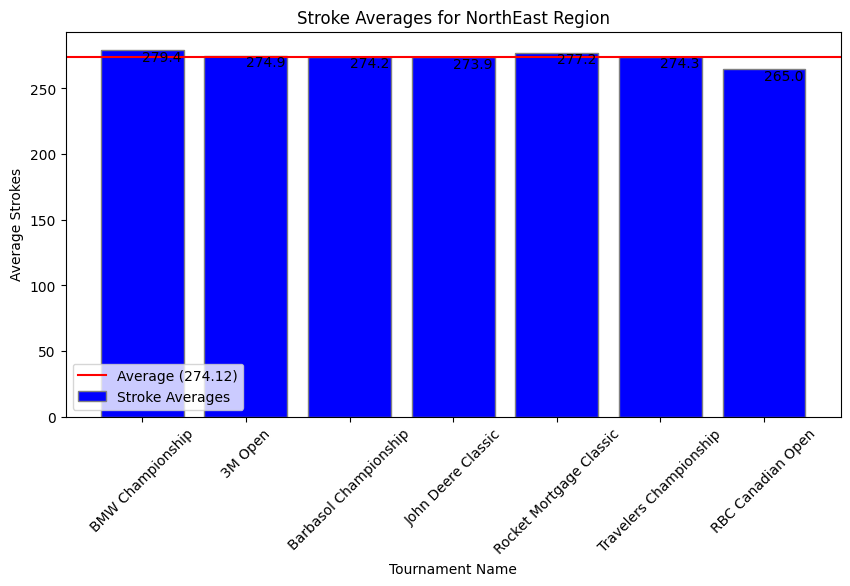

In [33]:
#First, I will plot each region's stroke average in a bar graph

#NorthEast
#create lists for keys and values in dictionary
keys = list(strokeAveragesNE.keys())
values = list(strokeAveragesNE.values())

# Calculate the average
average = np.mean(values)

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 5)) 
bar = ax.bar(keys, values, color='b', edgecolor='grey', label='Stroke Averages')

# Add a horizontal line for the average and the value above each bar
plt.axhline(y=average, color='r', linestyle='-', label=f'Average ({average:.2f})')
for bar in bar:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 1), va='top')

# Add labels and title
plt.xlabel('Tournament Name')
plt.ylabel('Average Strokes')
plt.title('Stroke Averages for NorthEast Region')

# Rotate the x-axis labels if they overlap
plt.xticks(rotation=45)

# Create legend & Show graphic
plt.legend()
plt.show()

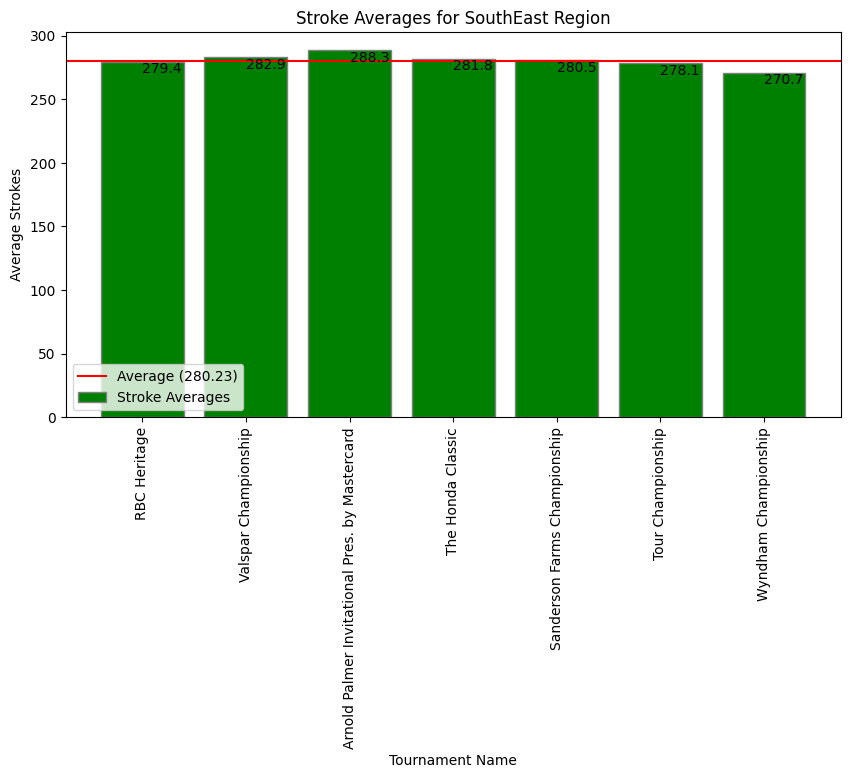

In [31]:
#southEast
keys = list(strokeAveragesSE.keys())
values = list(strokeAveragesSE.values())

average = np.mean(values)

fig, ax = plt.subplots(figsize=(10, 5)) 
bar = ax.bar(keys, values, color='g', edgecolor='grey', label='Stroke Averages')

plt.axhline(y=average, color='r', linestyle='-', label=f'Average ({average:.2f})')
for bar in bar:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 1), va='top')

plt.xlabel('Tournament Name')
plt.ylabel('Average Strokes')
plt.title('Stroke Averages for SouthEast Region')

plt.xticks(rotation=90)

plt.legend()
plt.show()

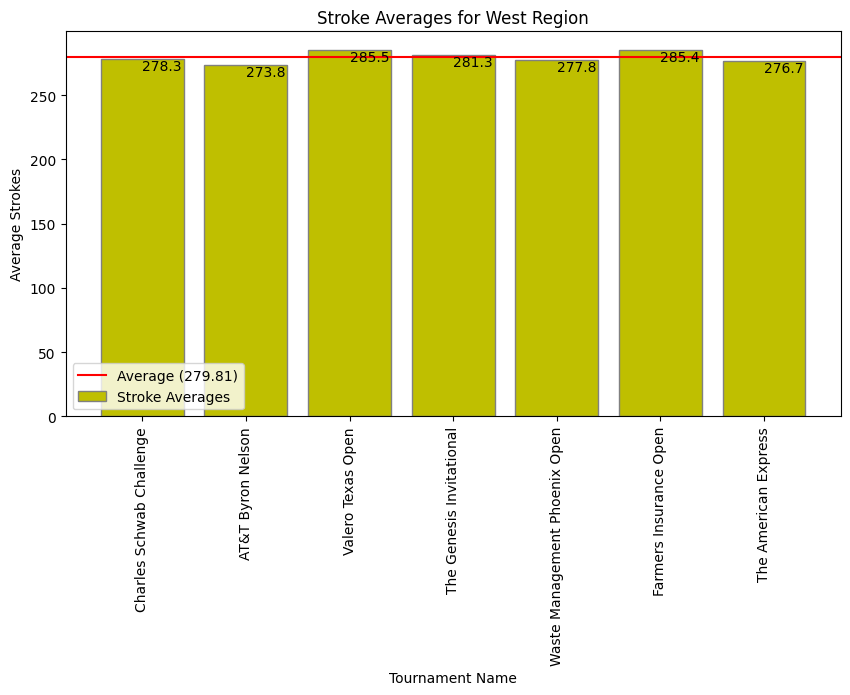

In [23]:
#West
keys = list(strokeAveragesWE.keys())
values = list(strokeAveragesWE.values())


average = np.mean(values)

fig, ax = plt.subplots(figsize=(10, 5)) 
bar = ax.bar(keys, values, color='y', edgecolor='grey', label='Stroke Averages')

plt.axhline(y=average, color='r', linestyle='-', label=f'Average ({average:.2f})')
for bar in bar:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 1), va='top')

plt.xlabel('Tournament Name')
plt.ylabel('Average Strokes')
plt.title('Stroke Averages for West Region')

plt.xticks(rotation=90)

plt.legend()
plt.show()


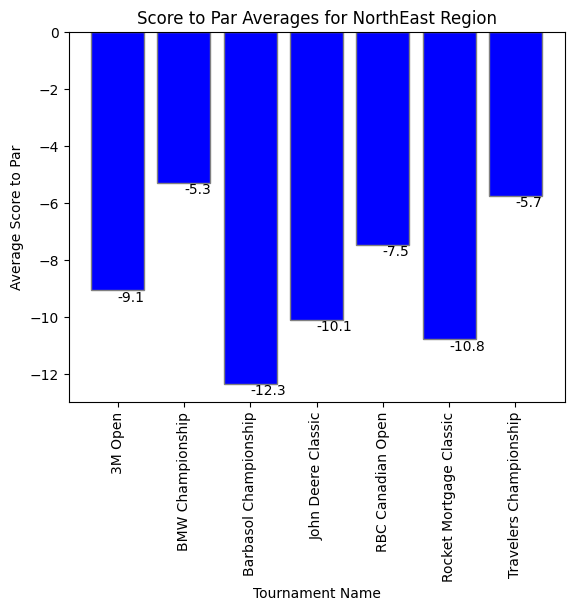

In [24]:
#Now, I will plot each region's score to par average in a bar graph

#NorthEast
fig, ax = plt.subplots()

# Create bar chart
bars = ax.bar(scoreToParNE.keys(), scoreToParNE.values(), color='b', edgecolor='grey')

#Add bar labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 1), va='top') 

plt.title('Score to Par Averages for NorthEast Region')
plt.xlabel('Tournament Name')
plt.ylabel('Average Score to Par')

plt.xticks(rotation=90)

plt.show()

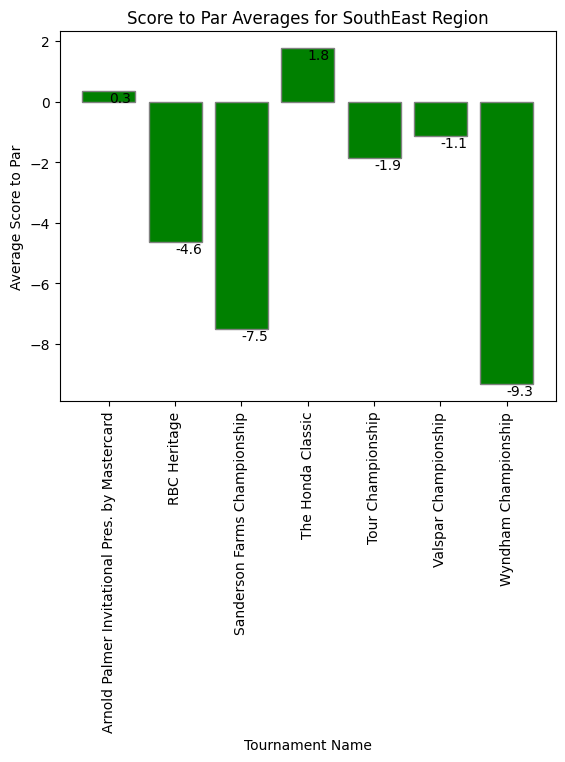

In [25]:
#SouthEast
fig, ax = plt.subplots()

bars = ax.bar(scoreToParSE.keys(), scoreToParSE.values(), color='g', edgecolor='grey')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 1), va='top') 

plt.title('Score to Par Averages for SouthEast Region')
plt.xlabel('Tournament Name')
plt.ylabel('Average Score to Par')

plt.xticks(rotation=90)

plt.show()

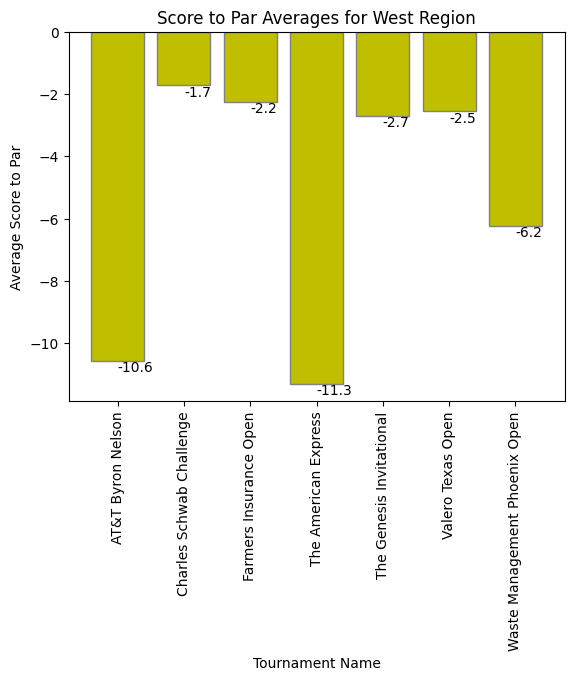

In [26]:
#SouthEast
fig, ax = plt.subplots()

bars = ax.bar(scoreToParWE.keys(), scoreToParWE.values(), color='y', edgecolor='grey')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 1), va='top') 

plt.title('Score to Par Averages for West Region')
plt.xlabel('Tournament Name')
plt.ylabel('Average Score to Par')

plt.xticks(rotation=90)

plt.show()

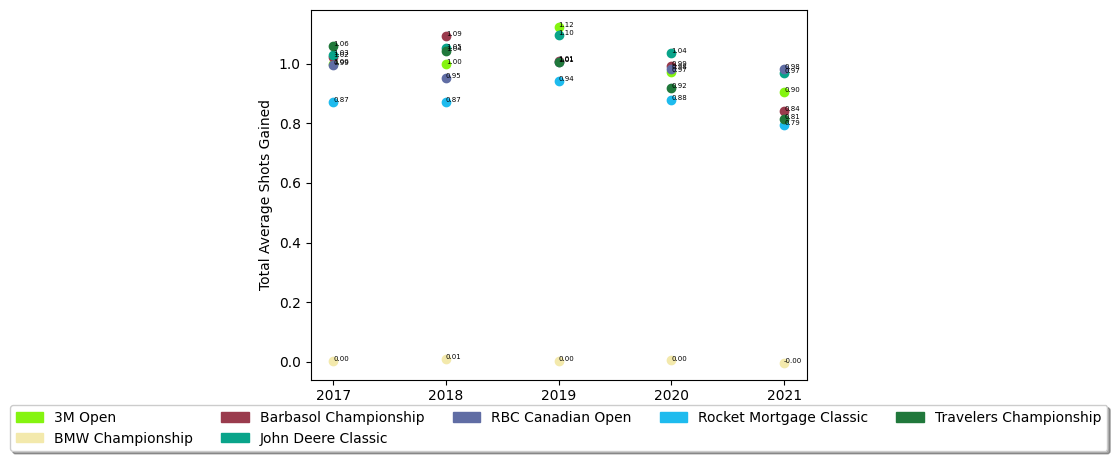

In [27]:
#Finally, I will plot each region's sg_total average in a scatter plot

#NorthEast

#import packages to center legend and add labels to each point
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

#create color dictionary for each tournament
colors = {tournament: np.random.rand(3,) for year, tournaments in sg_total_averagesNE.items() for tournament in tournaments}

#plot each sg_total value for each tournament in each year, eliminating the Rocket Mortgage Classic
dontUse = 'Bmw Championship'
for year, tournaments in sg_total_averagesNE.items():
    for tournament, sg_total in tournaments.items():
        if tournament != dontUse:
            plt.scatter(year, sg_total, color=colors[tournament])
            plt.text(year, sg_total, f'{sg_total:.2f}', fontsize=5)  # label each plot with its sg_total value

#add chart labels
plt.xlabel('Year')
plt.ylabel('Total Average Shots Gained')

# Format x-axis to display only whole numbers
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Move legend below chart
patches = [mpatches.Patch(color=color, label=tournament) for tournament, color in colors.items()]
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

plt.show()


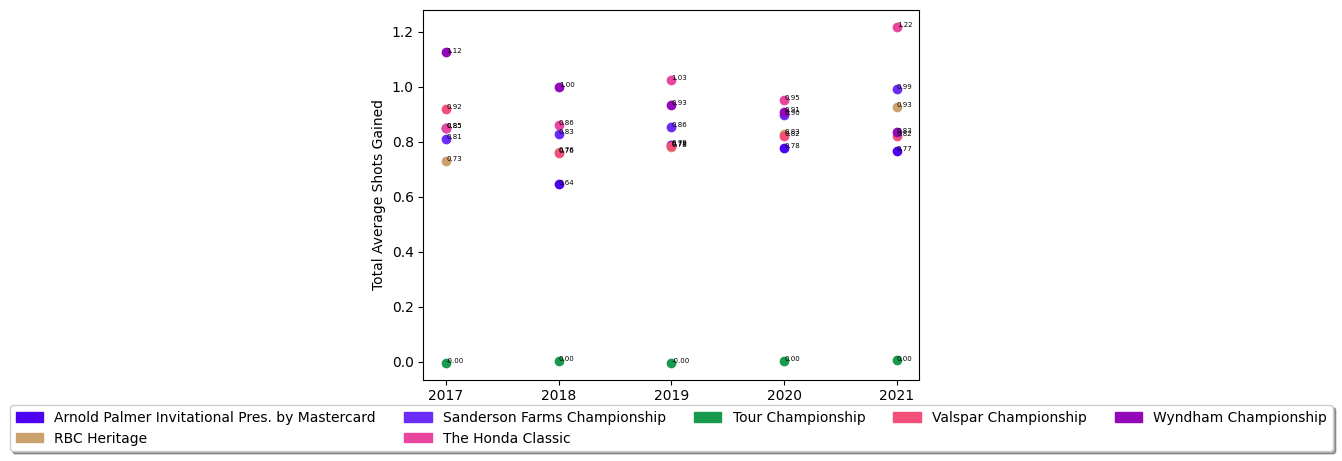

In [28]:
#And finally, the same for the other regions
#SouthEast

colors = {tournament: np.random.rand(3,) for year, tournaments in sg_total_averagesSE.items() for tournament in tournaments}

for year, tournaments in sg_total_averagesSE.items():
    for tournament, sg_total in tournaments.items():
        plt.scatter(year, sg_total, color=colors[tournament])
        plt.text(year, sg_total, f'{sg_total:.2f}', fontsize=5)

plt.xlabel('Year')
plt.ylabel('Total Average Shots Gained')

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

patches = [mpatches.Patch(color=color, label=tournament) for tournament, color in colors.items()]
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

plt.show()

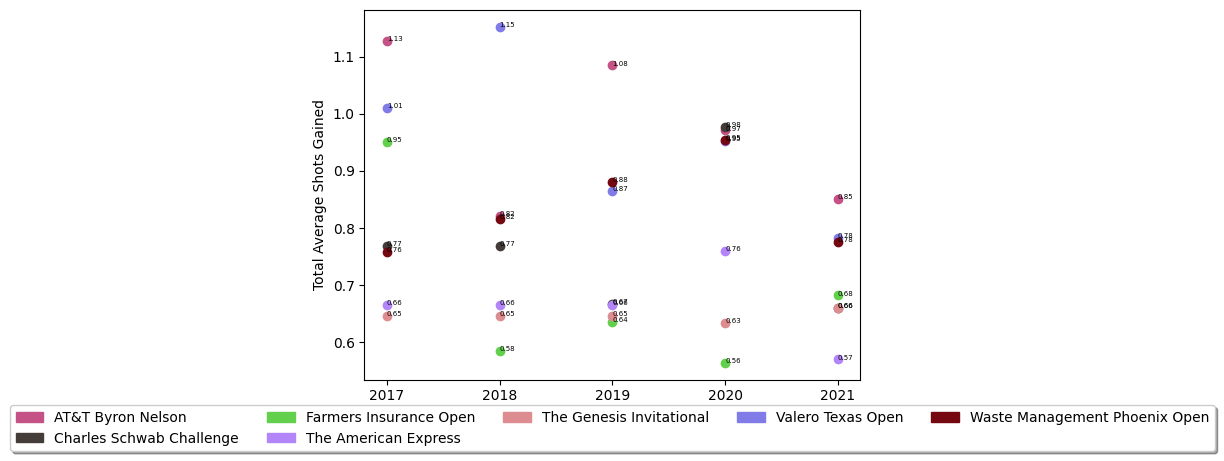

In [35]:
#West

colors = {tournament: np.random.rand(3,) for year, tournaments in sg_total_averagesWE.items() for tournament in tournaments}

for year, tournaments in sg_total_averagesWE.items():
    for tournament, sg_total in tournaments.items():
        plt.scatter(year, sg_total, color=colors[tournament])
        plt.text(year, sg_total, f'{sg_total:.2f}', fontsize=5)

plt.xlabel('Year')
plt.ylabel('Total Average Shots Gained')

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

patches = [mpatches.Patch(color=color, label=tournament) for tournament, color in colors.items()]
plt.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

plt.show()

Conclusion notes

1. The data included in final analysis only took players who finished all four rounds into account. It did not account for the total par for the tournament (as some courses play as a par 70, 71, or 72), or the slope/rating of the courses as they are all very hard,. It is acknowledged that there are many factors that go into the final scoring averages for an entire field, but this study aims to paint a broad picture as to which region boasts the most ideal playing conditions.

2. The final averages for total shots showed a clear advantage to courses in the NorthEast, with an overall stroke average of 274.12 for the entire region. None of the tournaments in the NorthEast region had an average higher than 280, and the RBC Canadian Open had an average of 265.0 which was the lowest across all tournaments analyzed. The SouthEast region proved to be the toughest overall for total scoring with an average of 280.23 across all tournaments, and four tournaments finishing with an average over 280 strokes. The Arnold Palmer Invitational at Bay Hill also proved to be the toughest tournament across all regions, with an average of 288.3 strokes. The West region finished with an average of 279.81, 0.69 strokes tougher than the NorthEast region but 0.42 strokes easier on average than the SouthEast tournaments. The West had 3 tournaments finish with an average greater than 280 strokes. 

3. The score to par averages painted a similar picture to the total scoring, with slight differences in individual tournaments. The easiest tournament across all regions compared to the total par for the tournament was the Barbasol Championship with an average score of -12.3, although it is still a NorthEast tournament. The NorthEast did not have a tournament that averaged less than 5 strokes under par, with both other regions recording at least 4 such tournaments (5 in the SouthEast) The hardest tournament compared to total par, again stayed in the same region, but was the Honda Classic with an average score of +1.8. The West, however, did have the second best individual score to par average, with The American Express at La Quinta CC finishing with an average of -11.3.

4. The shots gained charts showed the same story with a few outliers. The BMW Championship (NE) and the Tour Championship (SE) hardly recorded any shots gained average numbers. The NorthEast region as a whole showed slightly higher averages in total strokes gained than the SouthEast or West regions, and much more consistent numbers (aside from BMW Championship) than the other regions. The total average ranged from 0.79-1.12 in the NorthEast, whereas the range for the Southeast was 0.64-1.22 and the West ranged from 0.56-1.15.

5. Overall, it seems fair to me to come to the conclusion that for whatever the factors may be, Tour pros shoot better overall on average at tournaments held in the NorthEast region of the United States, as opposed to tournaments played in the SouthEast or West regions. The reasons behind this could vary from weather conditions, to time of year in which the tournament is played, course conditions, field strength, or the course setup itself, but the numbers clearly show a correlation between those NorthEast tournaments and lower scores. Does this mean everyone will experience lower scoring during a round in Upstate NY as opposed to a round in Myrtle Beach, SC? No, of course not, but it is worth noting that over a 5 year period the averages on the PGA Tour pointed to the NorthEast being the premier golf region in the US. 